In [1]:
import pandas as pd


In [2]:
lc=pd.read_csv(r"C:\Users\Legion\Documents\python pandas\LungCapData.csv")
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [3]:
#steps involved in model building
#1 requirment gathering (to build the predective model which can predict lungcap)
#2 data gathring
#3 data cleaning 
#4 data sorting
#5 data modeling

In [4]:
lc.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [29]:
lc.Smoke=lc.Smoke.replace({'no':0,'yes':1})
lc.Gender=lc.Gender.replace({'male':0,'female':1})
lc.Caesarean=lc.Caesarean.replace({'no':0,'yes':1})

In [30]:
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
lc_train,lc_test=train_test_split(lc,test_size=.2)

In [32]:
lc_train_x=lc_train.iloc[:,1::]
lc_train_y=lc_train.iloc[:,0]

lc_test_x=lc_test.iloc[:,1::]
lc_test_y=lc_test.iloc[:,0]

In [33]:
lc_train_x.head()

,Age,Height,Smoke,Gender,Caesarean
292,3,52.9,0,0,0
100,13,66.2,1,0,0
120,16,67.9,0,0,0
85,12,63.3,0,1,1
185,10,64.3,0,0,1


In [34]:
lc_test_y

603     7.675
234     8.625
369    11.650
25      8.350
486     2.375
        ...  
236     5.725
713     9.325
400     2.000
572     6.900
18      7.025
Name: LungCap, Length: 145, dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder #required import 
le= LabelEncoder
le.fit_transform 


<function sklearn.preprocessing._label.LabelEncoder.fit_transform(self, y)>

In [36]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()

In [37]:
linreg.fit(lc_train_x,lc_train_y)

LinearRegression()

In [38]:
linreg.score(lc_train_x,lc_train_y) #adjusted r square

0.8530902788081687

In [39]:
Rsquare=linreg.score(lc_train_x,lc_train_y)
N=lc_train_x.shape[0]
K=lc_train_x.shape[1]

Adju_Rsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adju_Rsquare

0.8518105774040586

In [40]:
linreg.intercept_

-10.701009374733543

In [41]:
linreg.coef_

array([ 0.17472129,  0.25762646, -0.63772391, -0.3376991 , -0.20217228])

In [42]:
lc_train_x.head(2)

,Age,Height,Smoke,Gender,Caesarean
292,3,52.9,0,0,0
100,13,66.2,1,0,0


In [43]:
pred_train=linreg.predict(lc_train_x)

In [44]:
pred_test=linreg.predict(lc_test_x)

In [45]:
#errors --diff between predict and actul
#checking the assumption
#assumptions only check on the train data

In [46]:
lc_train_y

292    5.475
100    8.025
120    8.550
85     6.125
185    7.200
       ...  
378    4.900
161    4.900
90     6.950
200    9.550
692    6.050
Name: LungCap, Length: 580, dtype: float64

In [47]:
pred_train

array([ 3.45159434,  7.98751526,  9.58736802,  7.16352976,  7.40941275,
        8.02209902,  4.76038107,  7.83504691, 10.83922822,  6.41641302,
       10.7466871 ,  5.78526968,  9.84170078,  8.08984083,  9.23230821,
        9.77404879,  8.31964496,  8.06800708, 10.74106986,  7.28132453,
        8.0326983 ,  7.90671761, 11.39075325,  9.97664024,  8.8946091 ,
        8.53393206,  8.59947652,  9.19201739,  6.21761743,  4.96757859,
        8.2455609 ,  8.25396284, 11.38796855, 10.16588971,  8.41466495,
        8.00364196, 11.04181968,  7.8699365 ,  8.39899259,  9.46138732,
        5.12946005,  6.54129736, 12.05496482,  3.14295159,  7.97838831,
        9.61947291,  7.99291648,  9.09509304,  5.73652909,  9.81717214,
        8.34577895,  7.61281904,  5.67563853,  6.12296878,  7.69280186,
        8.20243755,  7.1483664 ,  7.28228786,  7.07669569,  6.40750208,
        2.75993179,  9.66136225,  7.37482899, 11.59516608, 11.69428777,
        7.99240748,  8.47066329,  6.39182972, 11.13874403,  5.97

In [48]:
err_train=lc_train_y-pred_train

In [49]:
err_train

292    2.023406
100    0.037485
120   -1.037368
85    -1.038530
185   -0.209413
         ...   
378   -0.833235
161   -0.441687
90    -0.181641
200    0.306457
692   -0.228054
Name: LungCap, Length: 580, dtype: float64

In [50]:
err_train.mean()#---mean of the error term should have be 0

3.381203363272201e-15

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 4.,  7., 10., 18., 27., 46., 42., 57., 48., 66., 65., 59., 39.,
        31., 27., 17., 10.,  3.,  1.,  3.]),
 array([-2.61678084, -2.33645528, -2.05612973, -1.77580417, -1.49547861,
        -1.21515305, -0.93482749, -0.65450194, -0.37417638, -0.09385082,
         0.18647474,  0.4668003 ,  0.74712586,  1.02745141,  1.30777697,
         1.58810253,  1.86842809,  2.14875365,  2.4290792 ,  2.70940476,
         2.98973032]),
 <BarContainer object of 20 artists>)

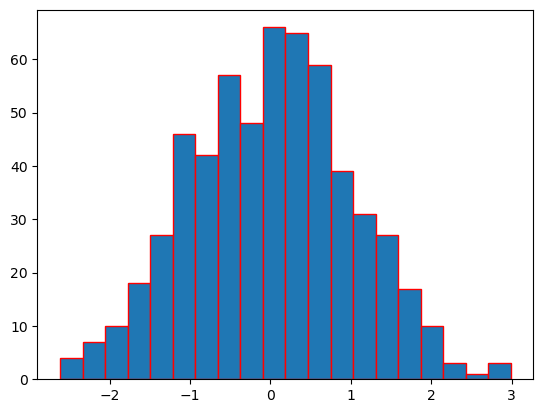

In [52]:
plt.hist(err_train,edgecolor='red',bins=20)

In [53]:
err_train.skew()

0.01408107850410953

In [54]:
err_train.kurtosis()

-0.26445195984520664

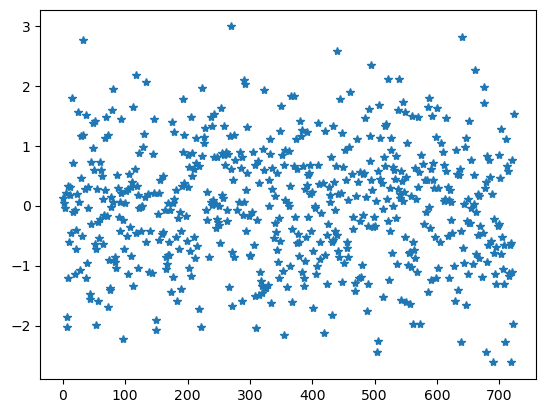

In [55]:
plt.plot(err_train,"*")# to see if errors  are random

In [56]:
pred_actual=pd.DataFrame()
pred_actual['Actual']=lc_train_y
pred_actual['pred']=pred_train

<Axes: xlabel='Actual', ylabel='pred'>

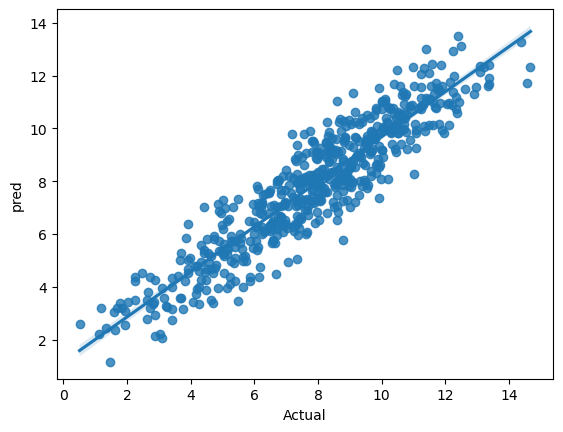

In [57]:
sns.regplot(x='Actual',y='pred',data=pred_actual)

In [58]:
#mse,rmse,mape on test data or if u  want 

In [59]:
err_test=lc_test_y-pred_test
err_test

603   -0.838787
234   -0.376589
369    0.322007
25     1.364024
486   -0.402292
         ...   
236    0.548488
713    0.705378
400   -0.624405
572    0.754053
18     1.012759
Name: LungCap, Length: 145, dtype: float64

In [60]:
import  numpy as np

In [61]:
mse=np.mean(np.square(err_test))
mse

1.1130949635202412

In [62]:
np.sqrt(mse)#rmse

1.0550331575454115

In [63]:
MAPE=np.mean(np.abs(err_test*100/lc_test_y))
MAPE

13.332002611591934

In [64]:
ACC=100-MAPE
ACC

86.66799738840807

In [41]:
#property price
# car price

In [289]:
import pandas as pd 

In [290]:
pp=pd.read_csv(r"C:\Users\Legion\Documents\python pandas\Property_Price_Train.csv")
pp.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [291]:
pp.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64

In [292]:
pp.isnull().sum()[pp.isnull().sum()>0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [293]:
pp.Lot_Extent.fillna(pp.Lot_Extent.mean(),inplace = True)

pp.Brick_Veneer_Type.fillna('None', inplace = True)
pp.Brick_Veneer_Area.fillna(0,inplace= True)
pp.Basement_Height.fillna('TA',inplace = True)
pp.Basement_Condition.fillna('TA',inplace = True)
pp.Exposure_Level.fillna('No',inplace = True)
pp.BsmtFinType1.fillna('No',inplace = True)
pp.BsmtFinType2.fillna('Unf',inplace = True)
pp.Electrical_System.fillna('SBrkr',inplace = True)

pp.Garage.fillna('Attchd',inplace = True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(), inplace = True)
pp.Garage_Finish_Year.fillna('Unf', inplace = True)
pp.Garage_Quality.fillna('TA',inplace = True)
pp.Garage_Condition.fillna('TA',inplace = True)



In [294]:
pp=pp.drop(['Fireplace_Quality','Pool_Quality','Fence_Quality','Miscellaneous_Feature','Lane_Type','Id'],axis=1)

In [295]:
pp.shape

(1459, 75)

In [296]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [297]:
pp[pp.select_dtypes(include = 'object').columns] = pp[pp.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [ ]:
#below code is to be done after entire your data cleaning and be fefore sampling 

feature selection (importance)

In [445]:
# df_x=pp.iloc[:,0:-1]
# df_y=pp.iloc[:,-1]

# corr_list=[]
# for col in df_x.columns:
#     corr_list.append(df_x[col].corr(df_y))
    
# feature_imp = pd.DataFrame()
# feature_imp['column']=df_x.columns
# feature_imp['corr']=corr_list
# feature_imp

# feature_imp1=feature_imp[(feature_imp['corr'] <-.3)|(feature_imp['corr']> .3)]
# l1=list(feature_imp1.column)
# l1.append('Sale_Price')

# pp=pp.loc[:,l1]
# pp.shape

(1396, 21)

In [446]:
featureimp.shape

(47, 2)

In [ ]:
#to build a mode; using least number of features but almost 

In [436]:
featureimp[(featureimp['corr']<-.3)|(featureimp['corr']>.3)]
l1=list(featureimp.columns)
l1.append('Sale_Price')

In [437]:
featureimp.shape

(74, 2)

In [298]:
pp.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [383]:
pp=df1

In [384]:
from sklearn.model_selection import train_test_split
pp_train,pp_test=train_test_split(pp,test_size=.2)

In [385]:
pp_train_x =pp_train.iloc[:,0:-1]
pp_train_y =pp_train.iloc[:,-1]

pp_test_x =pp_test.iloc[:,0:-1]
pp_test_y =pp_test.iloc[:,-1]

In [386]:
pp_train_x.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
1428,30,4,60.000000,7200,1,3,3,0,0,0,...,-66.416533,33.209159,0,0,0,0,2,2010,8,0
667,20,3,65.000000,8125,1,3,3,0,4,0,...,-38.797500,95.158934,0,0,0,0,10,2008,8,4
889,20,3,128.000000,12160,1,3,3,0,4,0,...,-23.529471,-72.824522,162,0,0,0,2,2009,8,4
1064,20,3,70.045833,11000,1,0,3,0,1,0,...,109.781395,-11.435454,0,0,0,0,11,2009,8,4
627,80,3,80.000000,9600,1,3,3,0,4,0,...,109.161386,-25.592413,0,0,0,0,3,2010,8,4


In [387]:
pp_test_y

520     106250
1234    130000
553     108000
1303    232000
516     158000
         ...  
1069    135000
1431    143750
242      79000
956     124000
1065    328000
Name: Sale_Price, Length: 280, dtype: int64

In [388]:
from sklearn.preprocessing import LabelEncoder #required import 
le= LabelEncoder
le.fit_transform 

<function sklearn.preprocessing._label.LabelEncoder.fit_transform(self, y)>

In [389]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()

In [390]:
linreg.fit(pp_train_x,pp_train_y)

LinearRegression()

In [391]:
linreg.score(pp_train_x,pp_train_y)

0.8687970887796757

In [392]:
Rsquare=linreg.score(pp_train_x,pp_train_y)
N=pp_train_x.shape[0]
K=pp_train_x.shape[1]

Adju_Rsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adju_Rsquare

0.8594704649273184

In [393]:
linreg.intercept_

795749.5190550641

In [394]:
linreg.coef_

array([-8.77074782e+01, -3.17246386e+03, -9.18550525e+01,  4.19816519e-01,
        2.69606199e+04, -1.30407482e+03,  2.02554943e+03, -3.58693678e+04,
        2.26596092e+02,  2.84135616e+03,  2.06188305e+02,  3.50054726e+02,
        3.44626386e+02, -1.10456713e+03, -9.85524491e+02,  1.03719585e+04,
        4.96351146e+03,  2.01250171e+02,  1.21110401e+02,  5.54805492e+02,
        2.05441697e+04, -1.46578478e+03,  8.53857318e+02,  2.34448484e+03,
        1.70580921e+01, -5.45091619e+03,  8.67005839e+02,  1.54306515e+03,
       -5.61487464e+03,  1.22982482e+03, -1.61331743e+03, -7.20874045e+02,
        3.52333621e+00,  2.64081163e+01,  6.94006863e+00, -2.62671551e+00,
        7.83668924e+00,  3.54932656e+01, -1.17534571e+03,  7.89673559e+02,
        8.82635729e+00,  1.26037929e+01,  1.73106398e+01, -6.17315822e+00,
        2.37412745e+01,  7.57602398e+03, -3.14824252e+03,  2.61235101e+03,
       -1.58413704e+03,  5.89917382e+02, -7.57672318e+03, -6.06005462e+03,
        8.74407608e+02,  

In [395]:
pp_train_x.head(2)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
1428,30,4,60.0,7200,1,3,3,0,0,0,...,-66.416533,33.209159,0,0,0,0,2,2010,8,0
667,20,3,65.0,8125,1,3,3,0,4,0,...,-38.797500,95.158934,0,0,0,0,10,2008,8,4


In [396]:
pred_train=linreg.predict(pp_train_x)

In [397]:
pred_test=linreg.predict(pp_test_x)

In [398]:
pp_train_y

1428    119000
667     193500
889     149500
1064    154000
627     153000
         ...  
880     157000
1447    240000
921     145900
988     195000
120     180000
Name: Sale_Price, Length: 1116, dtype: int64

In [399]:
pred_train

array([126767.01367887, 213745.5600064 , 161542.4792617 , ...,
       159222.29467459, 200636.51993168, 125717.66074282])

In [400]:
err_train=pp_train_y-pred_train
err_train

1428    -7767.013679
667    -20245.560006
889    -12042.479262
1064     -759.006797
627    -19451.193933
            ...     
880     -8890.680176
1447    -8444.492437
921    -13322.294675
988     -5636.519932
120     54282.339257
Name: Sale_Price, Length: 1116, dtype: float64

In [401]:
err_train.mean()

2.3940247633764822e-11

In [402]:
import matplotlib.pyplot as plt 
import seaborn as sns 

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,
          3.,  30., 117., 335., 366., 171.,  63.,  19.,   8.]),
 array([-240308.74403464, -224502.32549672, -208695.90695881,
        -192889.48842089, -177083.06988298, -161276.65134506,
        -145470.23280714, -129663.81426923, -113857.39573131,
         -98050.9771934 ,  -82244.55865548,  -66438.14011756,
         -50631.72157965,  -34825.30304173,  -19018.88450381,
          -3212.4659659 ,   12593.95257202,   28400.37110993,
          44206.78964785,   60013.20818577,   75819.62672368]),
 <BarContainer object of 20 artists>)

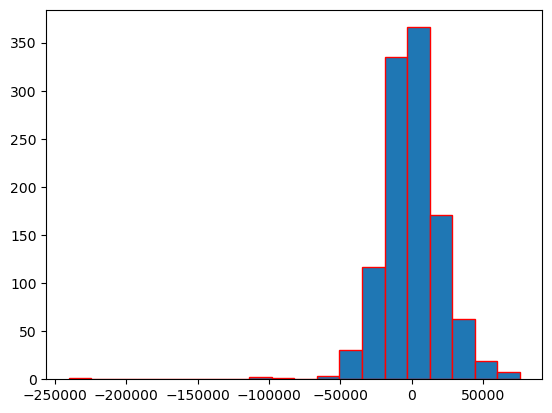

In [403]:
plt.hist(err_train,edgecolor='red',bins=20)

In [404]:
err_train.skew()

-1.2199923556272931

In [405]:
err_train.kurtosis()

15.69491323489877

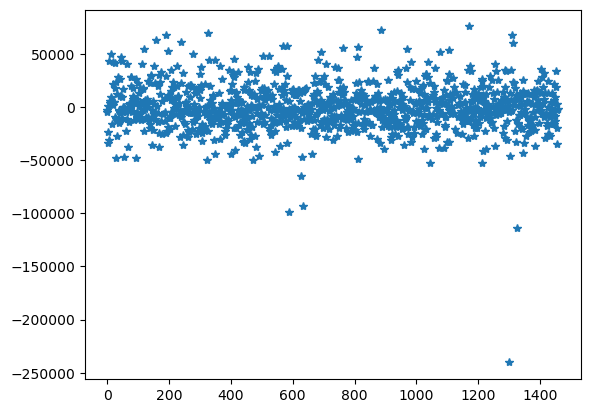

In [406]:
plt.plot(err_train,"*")

In [407]:
pred_actual=pd.DataFrame()
pred_actual['Actual']=pp_train_y
pred_actual['pred']=pred_train

<Axes: xlabel='Actual', ylabel='pred'>

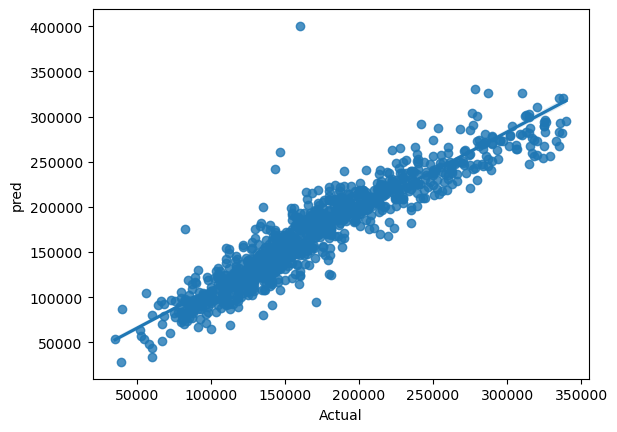

In [408]:
sns.regplot(x='Actual',y='pred',data=pred_actual)

In [409]:
err_test=pp_test_y-pred_test
err_test

520     35795.409318
1234    16684.532605
553     -5815.286066
1303    12095.103642
516    -20989.440586
            ...     
1069     9302.106470
1431     4310.954170
242    -18435.055844
956    -14345.032835
1065    80518.509248
Name: Sale_Price, Length: 280, dtype: float64

In [410]:
mse_train=np.mean(np.square(err_train))
mse_train

455094716.7605165

In [411]:
rmse_train=np.sqrt(mse_train)
rmse_train

21332.949087280842

In [412]:
MAPE_train=np.mean(np.abs(err_train*100/pp_train_y))
MAPE_train

9.497885403221328

In [413]:
import numpy as np

In [414]:
mse=np.mean(np.square(err_test))
mse

775015484.851396

In [415]:
np.sqrt(mse)

27839.099928902084

In [416]:
MAPE=np.mean(np.abs(err_test*100/pp_test_y))
MAPE

10.828319526040909

In [417]:
ACC=100-MAPE
ACC

89.17168047395909

In [447]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if x < mean + k * sd]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed == > ", df.shape[0] - df1.shape[0])


In [448]:
#outliers should be delete from entire data

In [449]:
pp.shape

(1396, 21)

In [450]:
remove_outliers(pp,'Sale_Price',2)

(1326, 21)
Number of outliers removed == >  70


In [451]:
df1.shape

(1326, 21)

In [452]:
#after removing outliers again model has to be build

In [582]:
cp=pd.read_csv(r"C:\Users\Legion\Documents\python pandas\car_price.csv")
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [583]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [584]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [585]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [586]:
import numpy as np

In [587]:
cp=cp.replace({'?':np.nan})


In [588]:
cp['normalized_losses'] = cp['normalized_losses'].astype(float)
cp.normalized_losses.fillna(cp.normalized_losses.mean(),inplace=True)
cp.num_of_doors.fillna('four',inplace=True)
cp['bore'] = cp['bore'].astype(float)
cp.bore.fillna(cp.bore.mean(),inplace=True)
cp['stroke'] = cp['stroke'].astype(float)
cp.stroke.fillna(cp.stroke.mean(),inplace=True)
cp['horsepower'] = cp['horsepower'].astype(float)
cp.horsepower.fillna(cp.horsepower.mean(),inplace=True)
cp['peak_rpm'] = cp['peak_rpm'].astype(float)
cp.peak_rpm.fillna(cp.peak_rpm.mean(),inplace=True)
cp['price'] = cp['price'].astype(float)
cp.price.fillna(cp.price.mean(),inplace=True)

In [591]:
cp.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [592]:
cp.num_of_doors.replace({'two':2, 'four':4},inplace=True)
cp.num_of_cylinders.replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},inplace=True)

In [593]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [594]:
cp[cp.select_dtypes(include = 'object').columns] = cp[cp.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [595]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,2,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,4,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,4,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [596]:
cp.shape

(205, 26)

In [597]:
from sklearn.model_selection import train_test_split
cp_train,cp_test=train_test_split(cp,test_size=.2)

In [598]:
cp_train_x =cp_train.iloc[:,0:-1]
cp_train_y =cp_train.iloc[:,-1]

cp_test_x =cp_test.iloc[:,0:-1]
cp_test_y =cp_test.iloc[:,-1]

In [599]:
cp_train_x.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
15,0,122.0,1,0,4,3,2,0,103.5,2,...,6,209,5,3.62,3.39,8.0,182.0,5400.0,16,22
52,1,104.0,1,0,2,2,1,0,93.1,8,...,4,91,1,3.03,3.15,9.0,68.0,5000.0,31,38
192,0,122.0,0,1,4,3,1,0,100.4,20,...,4,97,3,3.01,3.40,23.0,68.0,4500.0,33,38
89,1,128.0,1,0,2,3,1,0,94.5,12,...,4,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
71,-1,122.0,1,0,4,3,2,0,115.6,9,...,8,234,5,3.46,3.10,8.3,155.0,4750.0,16,18


In [600]:
cp_test_y

40     10295.000000
67     25552.000000
130     9295.000000
63     10795.000000
83     14869.000000
98      8249.000000
5      15250.000000
105    19699.000000
44     13207.129353
152     6488.000000
174    10698.000000
202    21485.000000
24      6229.000000
80      9959.000000
147    10198.000000
156     6938.000000
198    18420.000000
148     8013.000000
109    12440.000000
60      8495.000000
77      6189.000000
173     8948.000000
100     9549.000000
117    18150.000000
200    16845.000000
38      9095.000000
159     7788.000000
135    15510.000000
160     7738.000000
157     7198.000000
101    13499.000000
69     28176.000000
19      6295.000000
91      6649.000000
75     16503.000000
177    11248.000000
85      6989.000000
95      7799.000000
119     7957.000000
114    17075.000000
195    13415.000000
Name: price, dtype: float64

In [601]:
from sklearn.preprocessing import LabelEncoder #required import 
le= LabelEncoder
le.fit_transform 

<function sklearn.preprocessing._label.LabelEncoder.fit_transform(self, y)>

In [602]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()

In [603]:
linreg.fit(cp_train_x,cp_train_y)

LinearRegression()

In [604]:
linreg.score(cp_train_x,cp_train_y)

0.8872740131195119

In [605]:
Rsquare=linreg.score(cp_train_x,cp_train_y)
N=cp_train_x.shape[0]
K=cp_train_x.shape[1]

Adju_Rsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adju_Rsquare

0.8668526386846409

In [606]:
linreg.intercept_

-52243.70498022946

In [607]:
linreg.coef_

array([ 1.89705953e+02, -5.56126355e-01,  7.32296677e+03,  1.88705330e+03,
        4.93874320e+02, -5.51546045e+02,  1.32927858e+03,  1.27023500e+04,
        6.59440501e+01, -2.21025228e+02,  2.36444895e+01,  3.45272406e+02,
        2.90192410e+02,  2.13298456e+00,  4.66546308e+02, -1.62080226e+03,
        1.63234418e+02,  1.90201318e+02, -3.74797606e+03, -3.66469290e+03,
        5.99663952e+02, -1.35729282e+01,  1.88823275e+00,  1.03189461e+02,
       -1.13476156e+02])

In [608]:
cp_train_x.head(2)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
15,0,122.0,1,0,4,3,2,0,103.5,2,...,6,209,5,3.62,3.39,8.0,182.0,5400.0,16,22
52,1,104.0,1,0,2,2,1,0,93.1,8,...,4,91,1,3.03,3.15,9.0,68.0,5000.0,31,38


In [609]:
err_train=cp_train_y-pred_train

In [610]:
pred_train=linreg.predict(cp_train_x)

In [611]:
pred_test=linreg.predict(cp_test_x)

In [612]:
cp_train_y

15     30760.0
52      6795.0
192    13845.0
89      5499.0
71     34184.0
        ...   
48     35550.0
4      17450.0
139     7053.0
72     35056.0
185     8195.0
Name: price, Length: 164, dtype: float64

In [613]:
err_train.mean()

13430.020658900617

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns 

(array([29., 35., 20., 16., 14., 16., 12.,  2.,  3.,  2.,  0.,  1.,  1.,
         3.,  3.,  4.,  0.,  2.,  0.,  1.]),
 array([ 5002.22153228,  7019.24448109,  9036.2674299 , 11053.2903787 ,
        13070.31332751, 15087.33627632, 17104.35922513, 19121.38217394,
        21138.40512275, 23155.42807155, 25172.45102036, 27189.47396917,
        29206.49691798, 31223.51986679, 33240.5428156 , 35257.5657644 ,
        37274.58871321, 39291.61166202, 41308.63461083, 43325.65755964,
        45342.68050845]),
 <BarContainer object of 20 artists>)

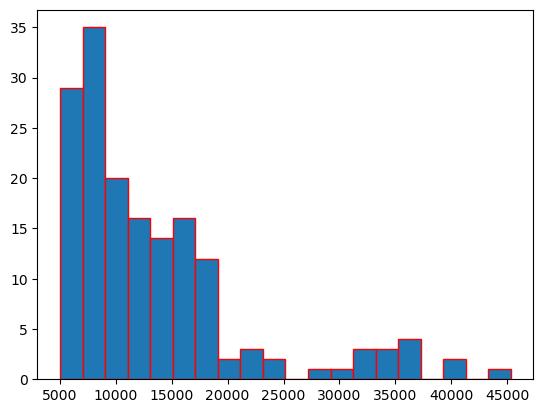

In [615]:
plt.hist(err_train,edgecolor='red',bins=20)

In [616]:
err_train.skew()

1.769612845541981

In [617]:
err_train.kurtosis()

2.8733957475088943

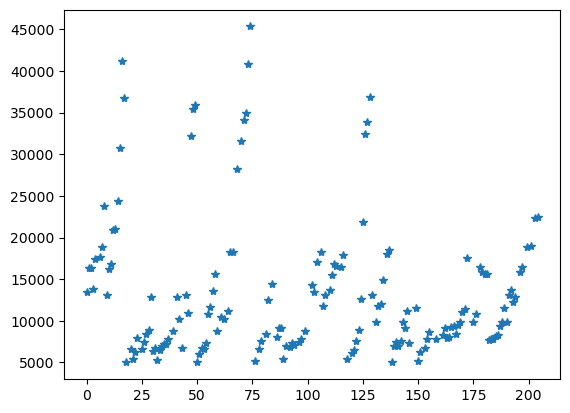

In [618]:
plt.plot(err_train,"*")

In [619]:
pred_actual=pd.DataFrame()
pred_actual['Actual']=cp_train_y
pred_actual['pred']=pred_train

<Axes: xlabel='Actual', ylabel='pred'>

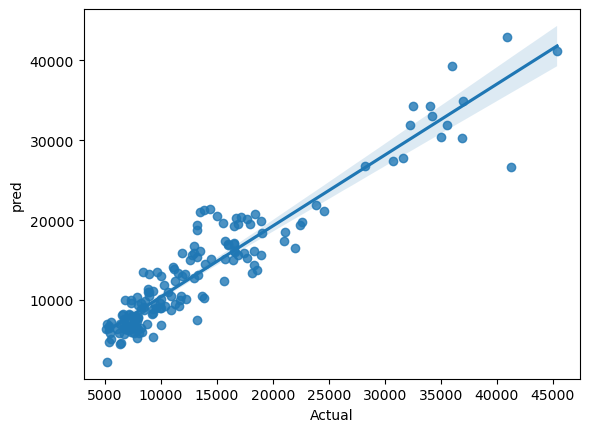

In [620]:
sns.regplot(x='Actual',y='pred',data=pred_actual)

In [621]:
err_test=cp_test_y-pred_test
err_test

40     -300.567734
67     -624.927564
130    -877.086110
63    -2517.314607
83     -319.337720
98     1283.984453
5      -147.357141
105   -1429.382498
44     6616.322198
152    1027.378083
174    -516.625736
202    -621.748038
24    -1896.399036
80     -416.280993
147     628.970293
156    1710.286690
198    3041.537641
148     631.193050
109   -4629.715031
60    -3352.764705
77     -126.562228
173     449.319072
100    -299.102394
117    -837.194835
200    -894.036849
38    -1388.938869
159     699.502398
135    2059.077392
160    2791.803761
157    1417.055559
101   -7651.399713
69     2498.997208
19    -1523.775917
91      769.272573
75    -1716.267240
177    2185.838085
85    -2533.348515
95     1474.235770
119     634.711070
114   -4320.522875
195   -3635.964480
Name: price, dtype: float64

In [622]:
mse=np.mean(np.square(err_test))
mse

5875059.3180425465

In [623]:
np.sqrt(mse)

2423.8521650551515

In [624]:
MAPE=np.mean(np.abs(err_test*100/cp_test_y))
MAPE

16.203274917044688

In [625]:
ACC=100-MAPE
ACC

83.7967250829553

In [627]:
df_x=cp.iloc[:,0:-1]
df_y=cp.iloc[:,-1]

corr_list=[]
for col in df_x.columns:
    corr_list.append(df_x[col].corr(df_y))
    
feature_imp = pd.DataFrame()
feature_imp['column']=df_x.columns
feature_imp['corr']=corr_list
feature_imp

feature_imp1=feature_imp[(feature_imp['corr'] <-.3)|(feature_imp['corr']> .3)]
l1=list(feature_imp1.column)
l1.append('price')

cp=cp.loc[:,l1]
cp.shape

(205, 14)